# Material de aula - FACENS - Aprendizado de Máquina


## Particle Swarm Optimization - Laboratório 04

In [44]:
#CÉLULA PSO-LIB-01
import numpy as np
import math
import matplotlib.pyplot as plt
from enum import Enum
from operator import xor
%matplotlib inline

In [45]:
#CÉLULA PSO-LIB-02
# Função para cálculo de fitness (aptidão de cada individuo)
def fitness(individual) :  
    
    #(x, y) = scale(individual)
    
    x = individual[0]
    y = individual[1]
    
    num = (np.sin(np.sqrt(x**2+y**2)))**2 - 0.5
    den = (1 + 0.001*(x**2+y**2)) ** 2
    z = 0.5 - (num / den)

    return z

In [46]:
#CÉLULA PSO-LIB-03
def plot_population(P, generation):
    
    xmin =-100
    xmax = 100
    ymin =-100
    ymax = 100
    
    xAxis = []
    yAxis = []
    for individual in P : #pega os individuos na população        
        x = individual['X']
        y = individual['Y']
        
        xAxis.append(x)
        yAxis.append(y)
    
    plt.figure()
    plt.plot(xAxis, yAxis, 'bo')
    plt.axis([xmin, xmax, ymin, ymax])
    
    plt.xlabel('x')
    plt.ylabel('y')
    sTitle = ('Populacao na geração {}'.format(generation))
    plt.title(sTitle)
    plt.grid()

In [47]:
#CÉLULA PSO-LIB-05
def calcAllPBest(vParticles) :
    vParticlesRet = []
    
    for particle in vParticles :
        x = particle['X']
        y = particle['Y']
        xBest = particle['XBest']
        yBest = particle['YBest']
        if (fitness((x,y)) >= fitness((xBest, yBest)) ) :
            particle['XBest'] = x
            particle['YBest'] = y
            
        vParticlesRet.append(particle)
    
    return vParticlesRet

In [48]:
#CÉLULA PSO-LIB-06
# Verifica o gbest
def calcGBest(vParticles) :
    #Inicializa variavel
    calcAllPBest(vParticles)
    x = vParticles[0]['XBest']
    y = vParticles[0]['YBest']
    maxFitness = fitness((x,y))

    for particle in vParticles :
        x = particle['XBest']
        y = particle['YBest']
        currentFitness = fitness((x,y))
        if ( currentFitness >= maxFitness ) :
            maxFitness = currentFitness
            gBest = {'X' : x, 'Y' : y, 'Fitness' : maxFitness}
    
    return gBest

In [49]:
#CÉLULA PSO-LIB-07
def calcPBest(particle) :   
    x = particle['X']
    y = particle['Y']
    xBest = particle['XBest']
    yBest = particle['YBest']
    currentFitness = fitness((x,y))
    if (currentFitness >= fitness((xBest, yBest)) ) :
        xBest = x
        yBest = y
                
    return (xBest, yBest)

## PSO - inicio

In [50]:
#CÉLULA PSO-MAIN-01
#Parâmetros
size_pop   = 100
max_generations = 100
stop_condition = 0.95

#Limites do dominio de definição
x_min = -100
x_max =  100

y_min = -100
y_max =  100


# Cada particula tem dados (X,Y, XBest, YBest)
gBest = {'X' : 0, 'Y' : 0, 'Fitness' : 0}
vParticles = []

deltaT = 1
c1 = 0.2
c2 = 0.3
w  = 0.2

vMax = 500 #limitação de velocidade

#r1 e r2 deverão ser extraídas de uma distribuição uniforme e são atualizadas a cada cálculo de velocidade da população
#as melhores posições, individual e global, são obtidas através da função de fitness

In [65]:
#CÉLULA PSO-MAIN-02
#Inicializando população
vParticles=[]

for i in range(0, size_pop):
    x   =  x_min + np.random.random() * (x_max - x_min)
    y   =  y_min + np.random.random() * (y_max - y_min)
    vx  = (x_min + np.random.random() * (x_max - x_min)) / deltaT
    vy  = (y_min + np.random.random() * (y_max - y_min)) / deltaT
    vParticles.append({'X' : x, 'Y' : y, 'XBest' : x, 'YBest' : y, 'VX' : vx, 'VY':vy })
    
#Calcula pBest
#vParticles = calcPBest(vParticles)

#Calcula gbest
gBest = calcGBest(vParticles)

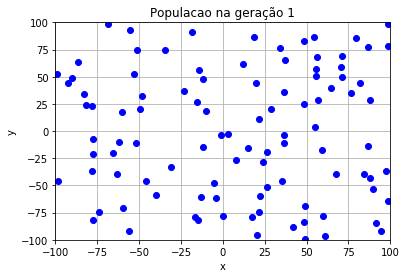

In [66]:
plot_population(vParticles, 1)

In [67]:
# CÉLULA PSO-MAIN-03
def runEpoch(vParticles) :
    #Atualizando vetor de velocidades
    
    #Calcule o valor dos parâmetros r1 e r2
    #IMPLEMENTE
    r1 = np.random.random()
    r2 = np.random.random()
    #=====================================#
 
  
    
    for particle in vParticles :
        
        #Atualiza pbest
        (xBest, yBest) = calcPBest(particle)
        particle['XBest'] = xBest
        particle['YBest'] = yBest        
        
        #Atualiza gbest
        gBest = calcGBest(vParticles)
        
        #Atualiza velocidade de uma particula
        #IMPLEMENTE
        newVX = w * particle['VX'] + c1 * r1 * (xBest - particle ['X']) + c2 * r2 * (gBest['X'] - particle['X'])
        newVY = w * particle['VY'] + c1 * r1 * (yBest - particle ['Y']) + c2 * r2 * (gBest['Y'] - particle['Y'])
        #=====================================#
        
        #Verifica limite de velocidade VmAX
        #IMPLEMENTE
        if newVX >= vMax :
            newVX = vMax
            
        if newVX <= -vMax :
            newVX = -vMax
        
        if newVY >= vMax :
            newVY = vMax
            
        if newVY <= -vMax :
            newVY = -vMax
            
        #=====================================#

        #Atualiza a velocidade da particula
        particle['VX'] = newVX
        particle['VY'] = newVY

        #Atualiza a posição da particula nas variáveis abaixo
        #IMPLEMENTE
        newX = particle['X'] + newVX
        newY = particle['Y'] + newVY
        #=====================================#
        
        particle['X'] = newX
        particle['Y'] = newY

    return vParticles

## Validação

    print('============================')
    vParticles = runEpoch(vParticles)
    plot_population(vParticles, 1)
    gBest = calcGBest(vParticles)


### Observe se ocorre convergência

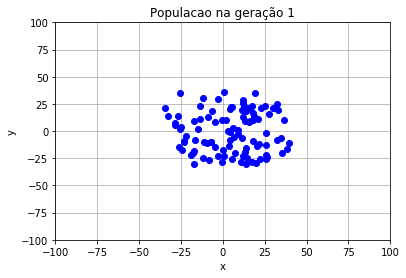

In [76]:
print('============================')
vParticles = runEpoch(vParticles)
plot_population(vParticles, 1)
gBest = calcGBest(vParticles)
